## Pytorch workflow

In [1]:
import torch
from torch import nn ## nn contains all of pytorch's building blocks for neural networks
import matplotlib.pyplot as plt

##check pytorch version
print(torch.__version__)

1.12.1+cu113


## 1. Data (preparing and loading)

Machine learning is a game of two parts

1.   Get data into a numerical representation.
2.   Build a models to learn patterns in that numerical representation



In [2]:
## crate *known* parameters
weight=0.7
bias=0.3

#create data
start=0
end=1
step=0.02
X=torch.arange(start,end,step).unsqueeze(dim=1)
y= weight*X+bias
print(X[:10],y[:10])

tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800]]) tensor([[0.3000],
        [0.3140],
        [0.3280],
        [0.3420],
        [0.3560],
        [0.3700],
        [0.3840],
        [0.3980],
        [0.4120],
        [0.4260]])


In [3]:
len(X),len(y)

(50, 50)

## splitting data into training and testing

In [4]:


## Create a train/test split
train_split= int(0.8 * len(X))
X_train,y_train= X[:train_split], y[:train_split]
X_test,y_test=X[train_split:],y[train_split:]

len(X_train),len(y_train),len(X_test),len(y_test)


(40, 40, 10, 10)

## visualize our data

In [5]:


def plot_prediction(train_data=X_train,
                    train_labels=y_train,
                    test_data=X_test,
                    test_labels=y_test,
                    predictions=None):
  """
  plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10,7))
  plt.scatter(train_data,train_labels,c="b",s=4,label="training data")
  plt.scatter(test_data,test_labels,c="g",s=4,label="testing data")
  if predictions is not None:
       plt.scatter(test_data,predictions,c="r",s=4,label="predictions")
  ## show legend
  plt.legend(prop={"size":14})
  plt.show()

In [6]:
X_train[1],y_train[1]

(tensor([0.0200]), tensor([0.3140]))

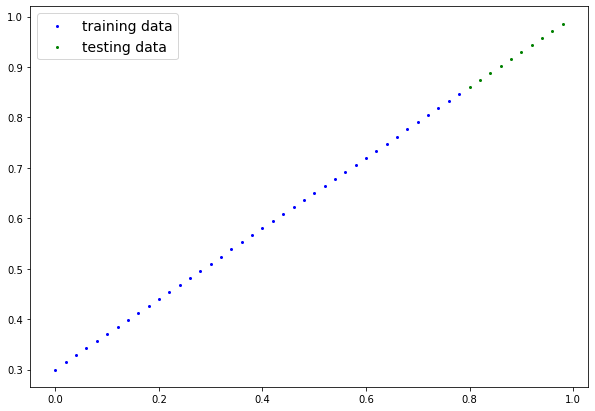

In [7]:
plot_prediction()

In [8]:
from torch import nn
class linearregression(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights=torch.nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float32))
    self.bias=torch.nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float32))
  def forward(self,x:torch.Tensor) -> torch.Tensor:  #computatuon performed,foward() tells the larger blocks how to make calculations on inputs (tensors full of data) within nn.Module(s)
    return self.weights *x + self.bias


In [9]:
## we have set all the parameters explicitly if you use torch.nn.linear() function the parameters will be handled automatically

In [10]:


obj=linearregression()

In [11]:

for i in obj.parameters():
  print(i)

Parameter containing:
tensor([-1.8971], requires_grad=True)
Parameter containing:
tensor([1.7344], requires_grad=True)


## PyTorch model building essentials

* torch.nn- contains all of the buildings for computational graphs( a neural network can be considered a computational graph)
* torch.nn.Parameters- What paramets should our model try and learn, often a Pytorch layers from torch.nn will set these for us
* torch.nn.Module - The base class for all neural netwok modules, if you subclass it, you should overwrite the forward method.
* torch.optim - this where the optimizers in Pytorch live, they will help with gradient decent
 

## Checking the contents of our Pytorch model

In [12]:

torch.manual_seed(42)


In [13]:

model_0=linearregression()

In [14]:

for i in model_0.parameters():
  print(i)

Parameter containing:
tensor([0.3367], requires_grad=True)
Parameter containing:
tensor([0.1288], requires_grad=True)


In [15]:

##list named parameters dict()
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

## Making prediction using `torch.inference_mode()`

In [16]:

with torch.inference_mode():
  y_preds= model_0(X_test)
y_preds

with torch.no_grad():    ## same as inference mode
   y_preds= model_0(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

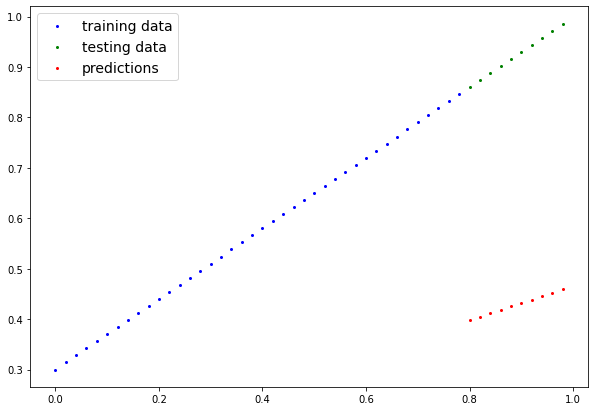

In [17]:
plot_prediction( predictions=y_preds)

## Train model



In [18]:
#setup a loss function
loss_fn= nn.L1Loss()

#setup a optimizer
optimizer= torch.optim.SGD(params=model_0.parameters(),lr=0.01)

In [19]:
optimizer

SGD (
Parameter Group 0
    dampening: 0
    foreach: None
    lr: 0.01
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)

## Building a training loop (and a testing loop) in PyTorch




1. Forward pass
2. Calculate the loss
3. Zero gradients
5. Perform backpropagation on the loss
4. Update the optimizer (gradient descent)

In [20]:
with torch.inference_mode():
  mode=list(model_0.parameters())
print(mode)

[Parameter containing:
tensor([0.3367], requires_grad=True), Parameter containing:
tensor([0.1288], requires_grad=True)]


In [21]:
## an epoch is one loop through the data..
epoch=100

## Track differenct values

epoch_count=[]
loss_values=[]
test_loss=[]
##loop through the data
for epoch in range(epoch):
    ## set the model to training mode
    model_0.train() ## train mode in PyTorch sets all parameters that require gradients to require gradients

    pred=model_0(X_train) ## forward pass and get the prediction result

    ## loss function
    loss=loss_fn(y_train,pred) ## calculate the loss

    ## zero the gradient

    optimizer.zero_grad()

    ## backpropaget and calculate the gradient
    loss.backward()

    ###Progress the optimizer
    optimizer.step()

    ## Testing
    model_0.eval() ## turns off different settings in the model not need for evaluation

    with torch.inference_mode(): ## turns off gradient tracking & couple of things same as torch.no_grad()
         # 1. do the forward pass
         test_pred= model_0(X_test)
         # 2.calculate the loss
         test_loss1= loss_fn(test_pred,y_test)
    if epoch %10 ==0:
        epoch_count.append(epoch)
        loss_values.append(loss.item())
        test_loss.append(test_loss1.item())
        print(f"Epoch: {epoch } | Loss : {loss} | Test Loss : {test_loss}")
        print(model_0.state_dict())




Epoch: 0 | Loss : 0.31288138031959534 | Test Loss : [0.48106518387794495]
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Epoch: 10 | Loss : 0.1976713240146637 | Test Loss : [0.48106518387794495, 0.3463551998138428]
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
Epoch: 20 | Loss : 0.08908725529909134 | Test Loss : [0.48106518387794495, 0.3463551998138428, 0.21729660034179688]
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
Epoch: 30 | Loss : 0.053148526698350906 | Test Loss : [0.48106518387794495, 0.3463551998138428, 0.21729660034179688, 0.14464017748832703]
OrderedDict([('weights', tensor([0.4512])), ('bias', tensor([0.3768]))])
Epoch: 40 | Loss : 0.04543796554207802 | Test Loss : [0.48106518387794495, 0.3463551998138428, 0.21729660034179688, 0.14464017748832703, 0.11360953003168106]
OrderedDict([('weights', tensor([0.4748])), ('bias', tensor([0.3868]))])
Epoch: 50 | Loss : 0.04167863354086876 | Test Loss : [0

Text(0.5, 0, 'epoch')

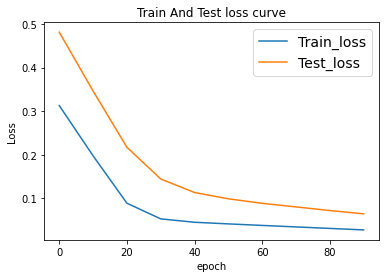

In [22]:
plt.plot(epoch_count,loss_values,label="Train_loss")
plt.plot(epoch_count,test_loss,label="Test_loss")
plt.title("Train And Test loss curve")
plt.legend(prop={"size":14})
plt.ylabel("Loss")
plt.xlabel("epoch")

In [23]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.5784])), ('bias', tensor([0.3513]))])

In [24]:
with torch.inference_mode():
  y_pred=model_0(X_test)

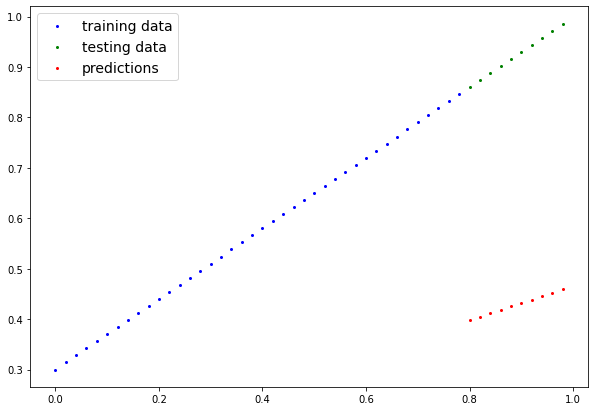

In [25]:
plot_prediction( predictions=y_preds)  #orginal random weigth and bias

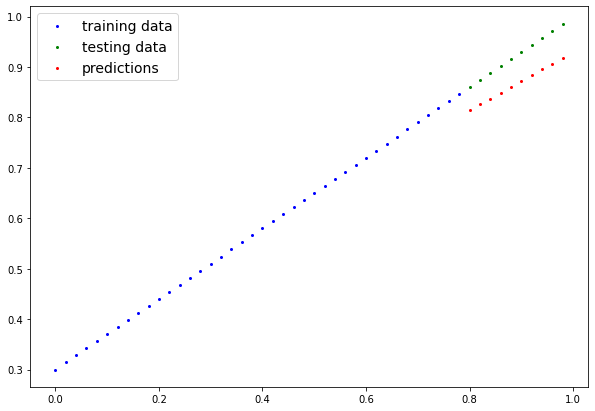

In [26]:
plot_prediction( predictions=y_pred)  #trained model

## saving and loading a model in pytorch

There are three main methods you shoild know about for saving and loading models in PyTorch.

1. `torch.save()` -allows you to save PyTorch  onject in Pythons pickle format
2. `torch.load()` - allows you to load a saved PyTorch object
3. `torch.nn.Module.load_state_dict()` - this allows to load a model's saved state dictionary

In [27]:
from pathlib import Path as path

## 1.create models directory

MODEL_PATH = path("models")
MODEL_PATH.mkdir(parents=True,exist_ok=True)
  
##2. Create model save parameter
MODEL_NAME= "save_model_0.pth"
MODEL_SAVE_PATH= MODEL_PATH / MODEL_NAME

# save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),f=MODEL_SAVE_PATH)

Saving model to: models/save_model_0.pth


## Loading a PyTorch model

Since we saved our model's state_dict() rather the entire model, we'll create a new instance of our model class and load the saved state_dict() into that.

In [28]:
loaded_model_0= linearregression()  #create instance 

## load the saved state_dict of model_0 (this will update a new instance with updated params)

loaded_model_0.load_state_dict(torch.load(MODEL_SAVE_PATH))

<All keys matched successfully>

In [29]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.5784])), ('bias', tensor([0.3513]))])

In [30]:
loaded_model_0.eval()
with torch.inference_mode():
   load_pred=loaded_model_0(X_test)
print(load_pred)

tensor([[0.8141],
        [0.8256],
        [0.8372],
        [0.8488],
        [0.8603],
        [0.8719],
        [0.8835],
        [0.8950],
        [0.9066],
        [0.9182]])


In [31]:
y_pred==load_pred

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

## putting it all together

In [32]:
import torch
from torch import nn
import matplotlib.pyplot as plt

#check pytorch version

torch.__version__

'1.12.1+cu113'

In [33]:
## setup device agnostic code
device="cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

##Data

In [34]:
weight = 0.7
bias= 0.3

start= 0
end=1
step=0.02

x= torch.arange(start,end,step)
y= weight*x + bias
x[:10],y[:10]

(tensor([0.0000, 0.0200, 0.0400, 0.0600, 0.0800, 0.1000, 0.1200, 0.1400, 0.1600,
         0.1800]),
 tensor([0.3000, 0.3140, 0.3280, 0.3420, 0.3560, 0.3700, 0.3840, 0.3980, 0.4120,
         0.4260]))

In [35]:
x.detach()  ## to off the autograd

tensor([0.0000, 0.0200, 0.0400, 0.0600, 0.0800, 0.1000, 0.1200, 0.1400, 0.1600,
        0.1800, 0.2000, 0.2200, 0.2400, 0.2600, 0.2800, 0.3000, 0.3200, 0.3400,
        0.3600, 0.3800, 0.4000, 0.4200, 0.4400, 0.4600, 0.4800, 0.5000, 0.5200,
        0.5400, 0.5600, 0.5800, 0.6000, 0.6200, 0.6400, 0.6600, 0.6800, 0.7000,
        0.7200, 0.7400, 0.7600, 0.7800, 0.8000, 0.8200, 0.8400, 0.8600, 0.8800,
        0.9000, 0.9200, 0.9400, 0.9600, 0.9800])

## Train test split

In [36]:
train_split= int(0.8 * len(x))
x_train,y_train=x[:train_split],y[:train_split]
x_test,y_test=x[train_split:],y[train_split:]

len(x_train),len(y_train),len(x_test),len(y_test)

(40, 40, 10, 10)

##visualize

In [37]:
def plot_prediction(x_train=x_train,y_train=y_train,x_test=x_test,y_test=y_test,prediction=None):
  plt.figure(figsize=(10,7))
  plt.scatter(x_train,y_train,color="red",label="training_data")
  plt.scatter(x_test,y_test,color="pink",label="test_data")
  if prediction != None:
    plt.scatter(prediction,y_test,color="blue",label="prediction")
  plt.legend(prop={"size":14})
  plt.show()

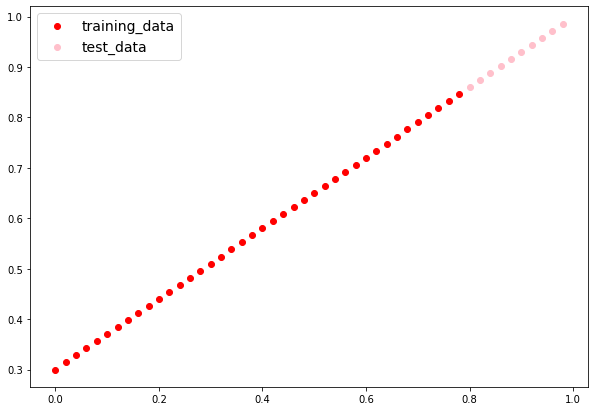

In [38]:
plot_prediction()

## Building a Pytorch linear model

In [39]:
## building model using nn.Linear

class LinerRegression(nn.Module):
  def __init__(self):
    super().__init__()
    self.liner_layer= nn.Liner(in_feature=1,out_features=1)
  def forward(self,x:torch.Tensor)->torch.Tensor:
    return self.linear_layer(x)

In [40]:
torch.manual_seed(42)
model=linearregression()

In [42]:
next(model.parameters()).device

device(type='cpu')

In [43]:
model.to(device)

linearregression()

In [44]:
## state_dict
from pprint import pprint 
pprint(model.state_dict())

OrderedDict([('weights', tensor([0.3367], device='cuda:0')),
             ('bias', tensor([0.1288], device='cuda:0'))])


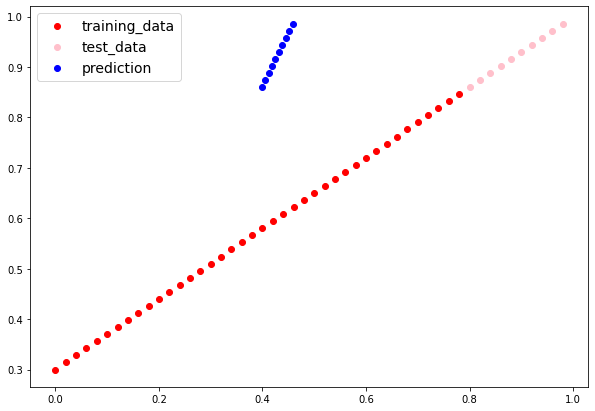

In [49]:
model.eval()
with torch.inference_mode():
  y_pred=model(x_test.to(device))
plot_prediction(prediction=y_pred.detach().cpu())

##Training

In [50]:
loss_fn=nn.L1Loss()

#create optimizer

optimizer= torch.optim.SGD(params=model.parameters(),lr=0.01)



In [51]:
optimizer.state_dict()

{'state': {},
 'param_groups': [{'lr': 0.01,
   'momentum': 0,
   'dampening': 0,
   'weight_decay': 0,
   'nesterov': False,
   'maximize': False,
   'foreach': None,
   'params': [0, 1]}]}

## Training loop

In [54]:
epoch=300
train_loss=[]
test_loss=[]
epoch_count=[]
x_train=x_train.to(device)
y_train=y_train.to(device)
x_test=x_test.to(device)
y_test=y_test.to(device)
for epoch in range(epoch):
  ## set the model in train mode
  model.train()
  ## forward pass
  y_pred=model(x_train)
  ##calculate the loss
  loss_train=loss_fn(y_pred,y_train)
  ## zero the gradient for every fresh epoch
  optimizer.zero_grad()
  ## calculate the gradient
  loss_train.backward()
  ## update the weights
  optimizer.step()

  ## evaluatuion
  model.eval()
  with torch.inference_mode():
    y_pred=model(x_test)
    loss_test=loss_fn(y_pred,y_test)
  if epoch%10==0:
    epoch_count.append(epoch)
    train_loss.append(loss_train.detach().cpu().numpy())
    test_loss.append(loss_test.detach().cpu().numpy())
    print(f"Epoch: {epoch} | MAE Train Loss: {loss_train} | MAE Test Loss: {loss_test} ")


Epoch: 0 | MAE Train Loss: 0.28983935713768005 | MAE Test Loss: 0.45412322878837585 
Epoch: 10 | MAE Train Loss: 0.1746293306350708 | MAE Test Loss: 0.3194132149219513 
Epoch: 20 | MAE Train Loss: 0.07638873159885406 | MAE Test Loss: 0.19773727655410767 
Epoch: 30 | MAE Train Loss: 0.05069301277399063 | MAE Test Loss: 0.13647659122943878 
Epoch: 40 | MAE Train Loss: 0.04463795945048332 | MAE Test Loss: 0.1100495383143425 
Epoch: 50 | MAE Train Loss: 0.040980637073516846 | MAE Test Loss: 0.09699546545743942 
Epoch: 60 | MAE Train Loss: 0.0375034399330616 | MAE Test Loss: 0.08666229248046875 
Epoch: 70 | MAE Train Loss: 0.03407188132405281 | MAE Test Loss: 0.07907667011022568 
Epoch: 80 | MAE Train Loss: 0.030638623982667923 | MAE Test Loss: 0.07080408930778503 
Epoch: 90 | MAE Train Loss: 0.027199817821383476 | MAE Test Loss: 0.06253156810998917 
Epoch: 100 | MAE Train Loss: 0.02376994863152504 | MAE Test Loss: 0.05494590476155281 
Epoch: 110 | MAE Train Loss: 0.02033500373363495 | MAE 

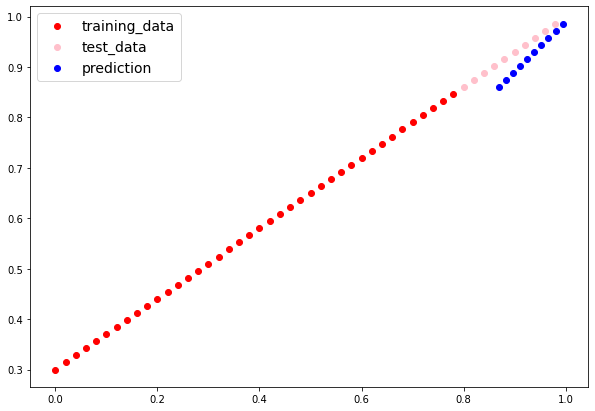

In [56]:
model.eval()
with torch.inference_mode():
  y_pred=model(x_test)
plot_prediction(prediction=y_pred.cpu())


## save the model

In [57]:
torch.save(obj=model.state_dict(),f="model.pth")

In [58]:
# Find our model's learned parameters
from pprint import pprint # pprint = pretty print, see: https://docs.python.org/3/library/pprint.html 
print("The model learned the following values for weights and bias:")
pprint(model.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")

The model learned the following values for weights and bias:
OrderedDict([('weights', tensor([0.6990], device='cuda:0')),
             ('bias', tensor([0.3093], device='cuda:0'))])

And the original values for weights and bias are:
weights: 0.7, bias: 0.3


In [59]:
x=torch.randn(size=(4,4))
x

tensor([[ 0.6784, -1.2345, -0.0431, -1.6047],
        [ 1.7878, -0.4780, -0.2429, -0.9342],
        [-0.7279, -0.5594, -0.7688,  0.7624],
        [-1.5673, -0.2394,  2.3228, -0.9634]])

In [60]:
x_view=x.view(2,4,2)
x_view

tensor([[[ 0.6784, -1.2345],
         [-0.0431, -1.6047],
         [ 1.7878, -0.4780],
         [-0.2429, -0.9342]],

        [[-0.7279, -0.5594],
         [-0.7688,  0.7624],
         [-1.5673, -0.2394],
         [ 2.3228, -0.9634]]])